<div class="alert alert-block alert-info" style="color: rgb(0,53,91);">
  <div style="text-align:center;"><img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png" style="width:600px; height:170px;" title="Logo ITESO"></div>
  <br><br>
  <div style="font-family:'Times New Roman'; font-size:52px; font-weight:bold; text-align:center;">Examen III</div>
  <div style="font-family:'Times New Roman'; font-size:27px; font-weight:bold; text-align:center;">Laboratorio de procesamiento de datos</div>
  <br><br><br><br>
  <div style="font-family:'Times New Roman'; font-size:17px; text-align:right;">Diego Eduardo Martínez Sincel</div>
  <div style="font-family:'Times New Roman'; font-size:17px; text-align:right;">Diego Ubaldo Crespo Neri</div>
  <div style="font-family:'Times New Roman'; font-size:17px; text-align:right;">Demien Becerra Lozano</div>
</div>

## Instrucciones

A continuación los pasos a realizar. Lee con atención  y responde en tu notebook lo que se pide: 

1. Tomar el dataset dado.
2. Hacer un análisis descriptivo y agrupado de los datos. De este punto se espera que el alumno identifique las carencias de la base (información faltante y/o mal presentada) así como el potencial de las variables predictoras hacia la variable de respuesta (`client_stayed`).
    - Este punto trata de analizar el estado en el cual se recibe el conjunto de datos **y explicarlo de manera somera pero con gráficos/tablas que soporten conclusiones preliminares**.
        - Nota: Solamente nombrar columnas o decir que hay X números NO es un análisis descriptivo EDA.
    - Hacer análisis cruzados: Análisis entre varias variables y no solo de manera individual. **Se espera que hagas estos análisis y expliques qué se hace y qué observas en cada uno**.
3. Preprocesar los datos.
    - Se espera que se limpien y/o estandaricen según sea necesario en este punto del proceso.
    - Rellenar información faltante.
      - Explicar el porqué del método elegido.
      - Evaluar los impactos en el conjunto de datos del método elegido. Responder:
          - ¿La variable después de rellenar cambió su distribución de alguna forma?
          - ¿Cambiaron estadísticos como el promedio y la desviación estándar de la variable?
          - ¿Cambió la correlación de la variable con la variable objetivo?
    - Generar un proceso de feature engineering.
        - Crear nuevas variables a partir de las existentes Se deben de crear al menos 5 variables y agregarlas al DataFrame para poder hacer los análisis subsecuentes. Para cada variable creada responder: 
            - ¿Cuál es tu hipótesis? ¿Por qué esa variable puede servir?
            - Después de observar el potencial de la variable explica su comportamiento. ¿Qué observas de tu variable al ser comparada con la variable de respuesta?
        - **Se debe de cuidar que no haya leakage en ninguna de las variables producidas**.
    - Generar un proceso de selección de variables.
        - Se debe de escoger entre al menos una de las siguientes opciones:
            - Varianza.
            - Correlaciones.
            - Coeficientes de una regresión logística.
        - Responder:
            - ¿Cómo se implementó el método utilizado? 
            - ¿Por qué se escogió este método?
            - ¿Qué variables se van a seleccionar con el método?
            - ¿**Cómo puedo demostrar** que las variables elegidas son mejores que las no elegidas?
            - ¿Algunas de las variables generadas con el punto b quedaron elegidas? ¿Por qué?


## Variables

A continuación se adjunta una descripción breve de las variables y de su contenido.

1. `Clientnum`: Id único para el cliente.
2. `Client_stayed`: **Variable de respuesta**. Es 1 si el cliente sigue con el banco o 0 si el cliente decidió dejar de ser cliente.
3. `Customer_age`: Edad del cliente medida en años.
4. `Gender`: Género del cliente. `M` para hombres y `F` para mujeres.
5. `Dependent_count`: Número de dependientes económicos del cliente.
6. `Education_level`: Escolaridad del cliente.
7. `Marital_status`: Estado civil del cliente.
8. `Income_category`: El banco no cuenta con los salarios exactos de los clientes, por lo que esta variable representa un aproximado medio del salario del mismo medido en dólares estadounidenses.
9. `Card_category`: Tipo de instrumento de crédito que tiene el cliente.
10. `Months_on_book`: Periodo en el que el cliente ha estado activo (desde la activación de su instrumento de crédito).
11. `Total_relationship_count`: Número de productos del banco que tiene el cliente. El cliente no está limitado a solo tener su instrumento de crédito, puede tener relación con otras áreas del banco.
12. `Months_inactive_12_mon`: Número de meses que el cliente ha dejado de utilizar su instrumento de crédito en los últimos 12 meses.
13. `Contacts_count_12_mon`: Número de contactos telefónicos que ha hecho el cliente al banco en los últimos 12 meses.
14. `Credit_limit`: Límite del instrumento crediticio medido en dólares estadounidenses.
15. `Total_revolving_bal`: Balance total del instrumento crediticio (cantidad a pagar por el cliente).
16. `Total_trans_amt`: Dinero transaccionado a través del instrumento crediticio en los últimos 12 meses.
17. `Total_trans_ct`: Número de transacciones realizadas a través del instrumento crediticio en los últimos 12 meses.

---

## Configuración

In [1]:
import os
import re
import warnings
from copy import deepcopy

import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Estilo/toutl.mplstyle')
from style import *

In [2]:
df = pd.read_csv('Datos/examen3.csv')

---

## Análisis Descriptivo


In [3]:
display(df)
display(df.info())

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,3,2,3,4003.0,1851,15476,117
10123,710638233,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,4,2,3,4277.0,2186,8764,69
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,5,3,4,5409.0,0,10291,60
10125,717406983,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,4,3,3,5281.0,0,8395,62


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   client_stayed             10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

None

- No hay nulos evidentes.
- La variable de respuesta es binaria.
- `credit_limit` parece tener enteros pero es interpretada como flotante.
    - Puede ser un error o haber valores con decimales.

In [4]:
display(df.describe(include='O'))
display(df.describe().round(2))

,gender,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,F,Graduate,Married,1666.6666666666667,Blue
freq,5358,3128,4687,3561,9436


,clientnum,client_stayed,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,0.84,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,4404.09,64.86
std,3.690378e+07,0.37,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,3397.13,23.47
min,7.080821e+08,0.00,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,510.00,10.00
25%,7.130368e+08,1.00,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,2155.50,45.00
50%,7.179264e+08,1.00,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3899.00,67.00
75%,7.731435e+08,1.00,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,4741.00,81.00
max,8.283431e+08,1.00,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,18484.00,139.00


- Las variables numéricas tienen magnitudes muy diferentes entre sí.
    - Será necesario estandarizar.

In [5]:
for col in df:
    unique_values = df[col].unique()
    num_unique = len(unique_values)
    
    print(f'Columna: {col}')
    print(f'  - Cardinalidad: {num_unique}')
    print(f'  - {unique_values}')

    print('_' * 40)

Columna: clientnum
  - Cardinalidad: 10127
  - [768805383 818770008 713982108 ... 716506083 717406983 714337233]
________________________________________
Columna: client_stayed
  - Cardinalidad: 2
  - [1 0]
________________________________________
Columna: customer_age
  - Cardinalidad: 45
  - [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
________________________________________
Columna: gender
  - Cardinalidad: 2
  - ['M' 'F']
________________________________________
Columna: dependent_count
  - Cardinalidad: 6
  - [3 5 4 2 0 1]
________________________________________
Columna: education_level
  - Cardinalidad: 7
  - ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
________________________________________
Columna: marital_status
  - Cardinalidad: 4
  - ['Married' 'Single' 'Unknown' 'Divorced']
________________________________________
Columna: income_categ

- En `clientnum` no hay IDs repetidos, por lo que podemos deshacernos de la columna.
- Tenemos variables con valores parecidos a nulos (en forma de 'Unknown'):
    - `education_level`
    - `marital_status`
    - `income_category`
- La mayoría de las variables categóricas son ordinales.
    -  A excepción de `marital_status` y `gender` que son nominales.

In [6]:
display(df['client_stayed'].value_counts(normalize=True))

client_stayed
1    0.83934
0    0.16066
Name: proportion, dtype: float64

- Conocer la proporción de clientes que se mantuvieron es escencial (variable de respuesta).
    - La mayoría se queda.

---

Nos deshacemos de la columna de IDs como mecionamos anteriormente.

In [7]:
if "clientnum" in df.columns:
    df = df.drop(["clientnum"], axis=1)

Para efecto de visualizar los datos con facilidad separamos las categorías en dos:
- Aquellas discretas y categóricas ($\text{cardinalidad} < 10$).
- Y las continuas ($\text{cardinalidad} > 10$).

Mantenemos en la variable de respuesta en ambos subconjuntos.

In [8]:
cardinalidad = df.nunique()

cols_baja = [col for col in df.columns if cardinalidad[col] < 10] 
cols_alta = [col for col in df.columns if cardinalidad[col] > 10] 
 
cardinalidad_baja = df[cols_baja]
cardinalidad_alta = df[['client_stayed'] + cols_alta]

display(cardinalidad_alta.head())
display(cardinalidad_baja.head())

,client_stayed,customer_age,months_on_book,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,1,45,39,12691.0,777,1144,42
1,1,49,44,8256.0,864,1291,33
2,1,51,36,3418.0,0,1887,20
3,1,40,34,3313.0,2517,1171,20
4,1,40,21,4716.0,0,816,28


,client_stayed,gender,dependent_count,education_level,marital_status,income_category,card_category,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon
0,1,M,3,High School,Married,5833.333333333333,Blue,5,1,3
1,1,F,5,Graduate,Single,1666.6666666666667,Blue,6,1,2
2,1,M,3,Graduate,Married,8333.333333333334,Blue,4,1,0
3,1,F,4,High School,Unknown,1666.6666666666667,Blue,3,4,1
4,1,M,3,Uneducated,Married,5833.333333333333,Blue,5,1,0


### Distribuciones

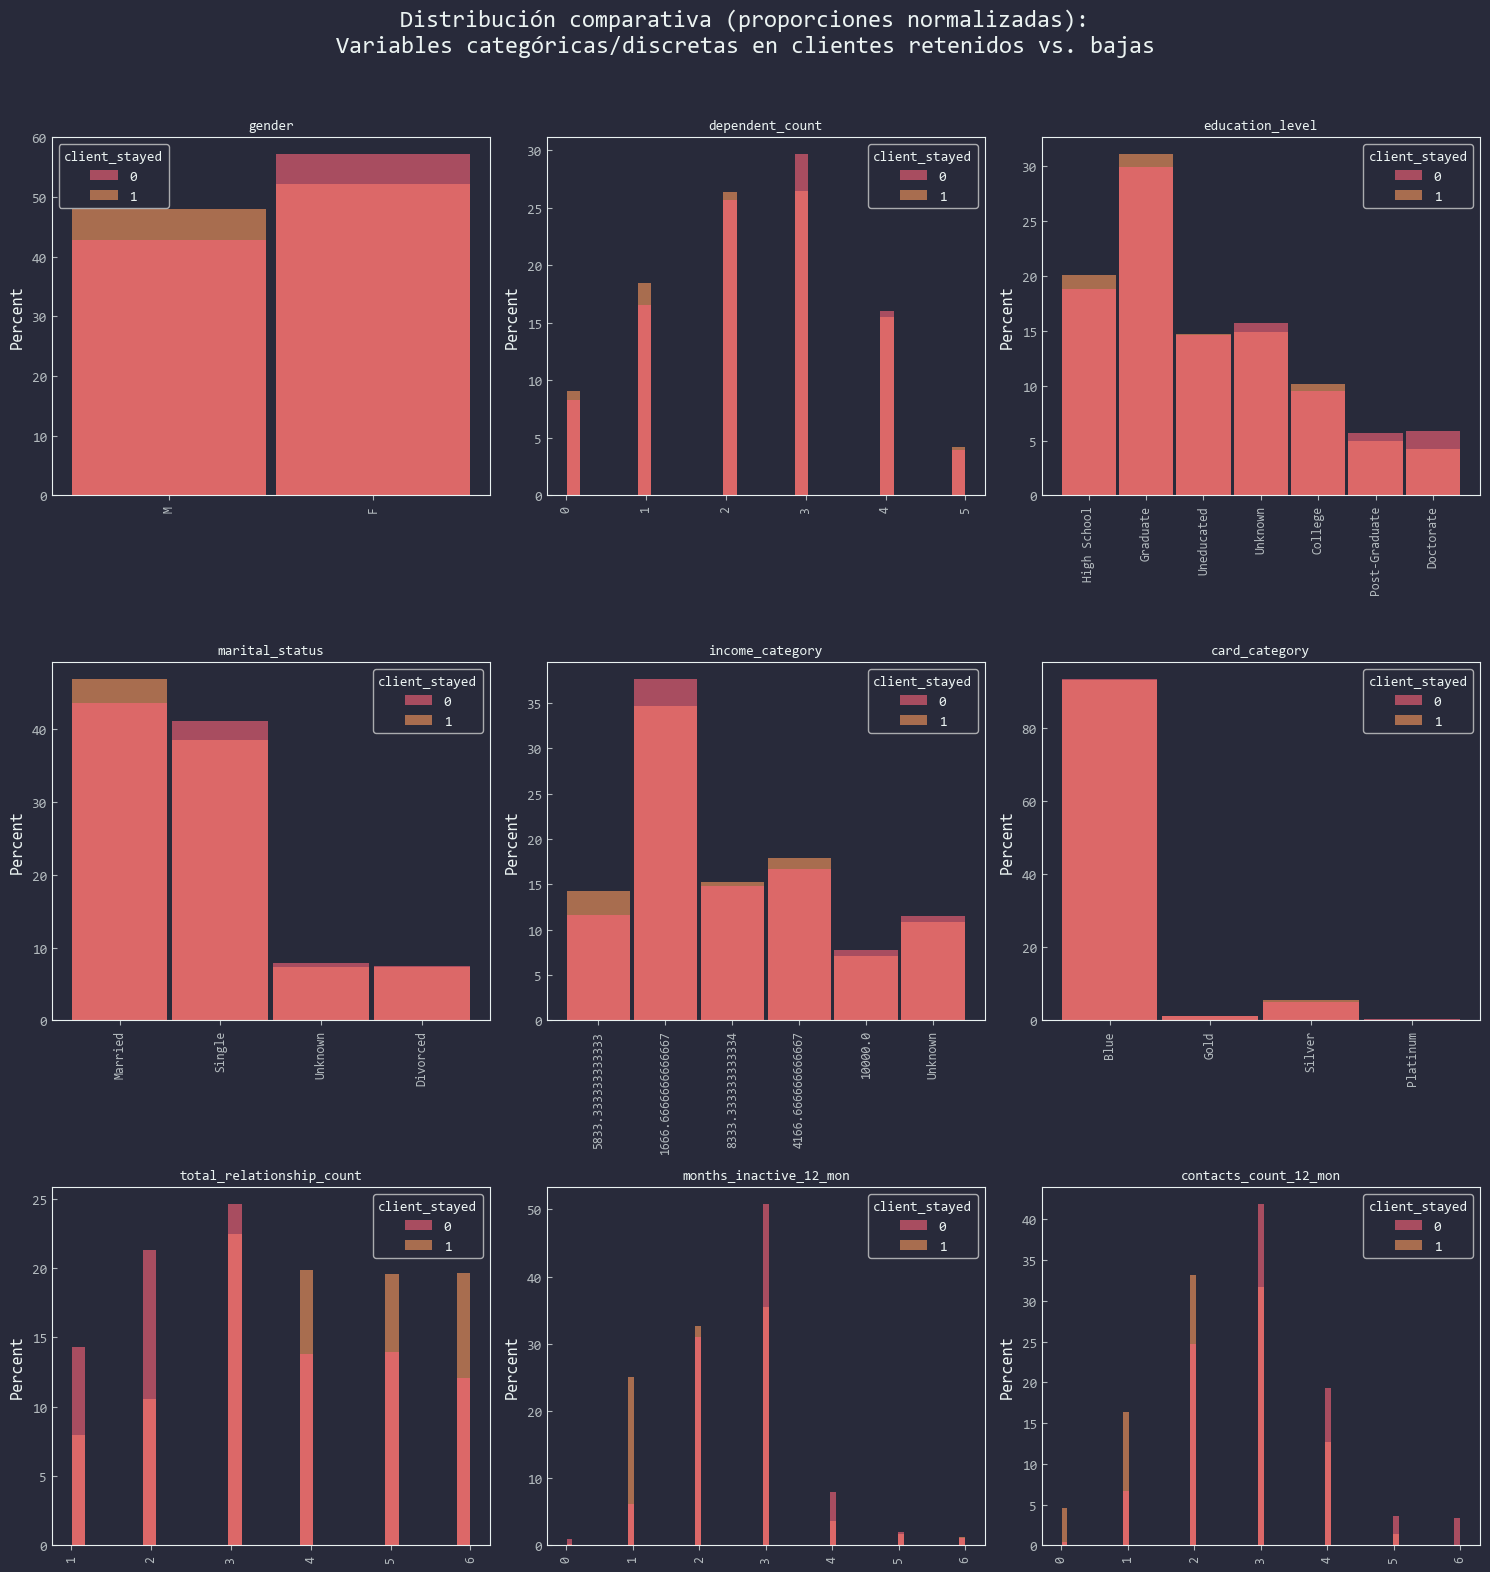

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 16))

for ax, column in zip(axes.flat, cardinalidad_baja.columns[1:]):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax, # multiple='dodge',
                 alpha=0.6, edgecolor='none', shrink=0.95,
                 stat='percent', common_norm=False)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

fig.suptitle("Distribución comparativa (proporciones normalizadas):\n" +
             "Variables categóricas/discretas en clientes retenidos vs. bajas",
             fontsize=17)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

- La mayoría de las variables tienen distribuciones similares entre clientes retenidos y bajas.
- Tres variables muestran diferencias notables:
    - `total_relationship_count`: Los clientes que se dan de baja tienen, en promedio, menos relaciones con otras áreas del banco.
    - `moths_inactive_12_mon`: Mayor inactividad en los que cancelan.
    - `contacts_count_12_mon`: Hay más contactos telefónicos previos en los que se van.

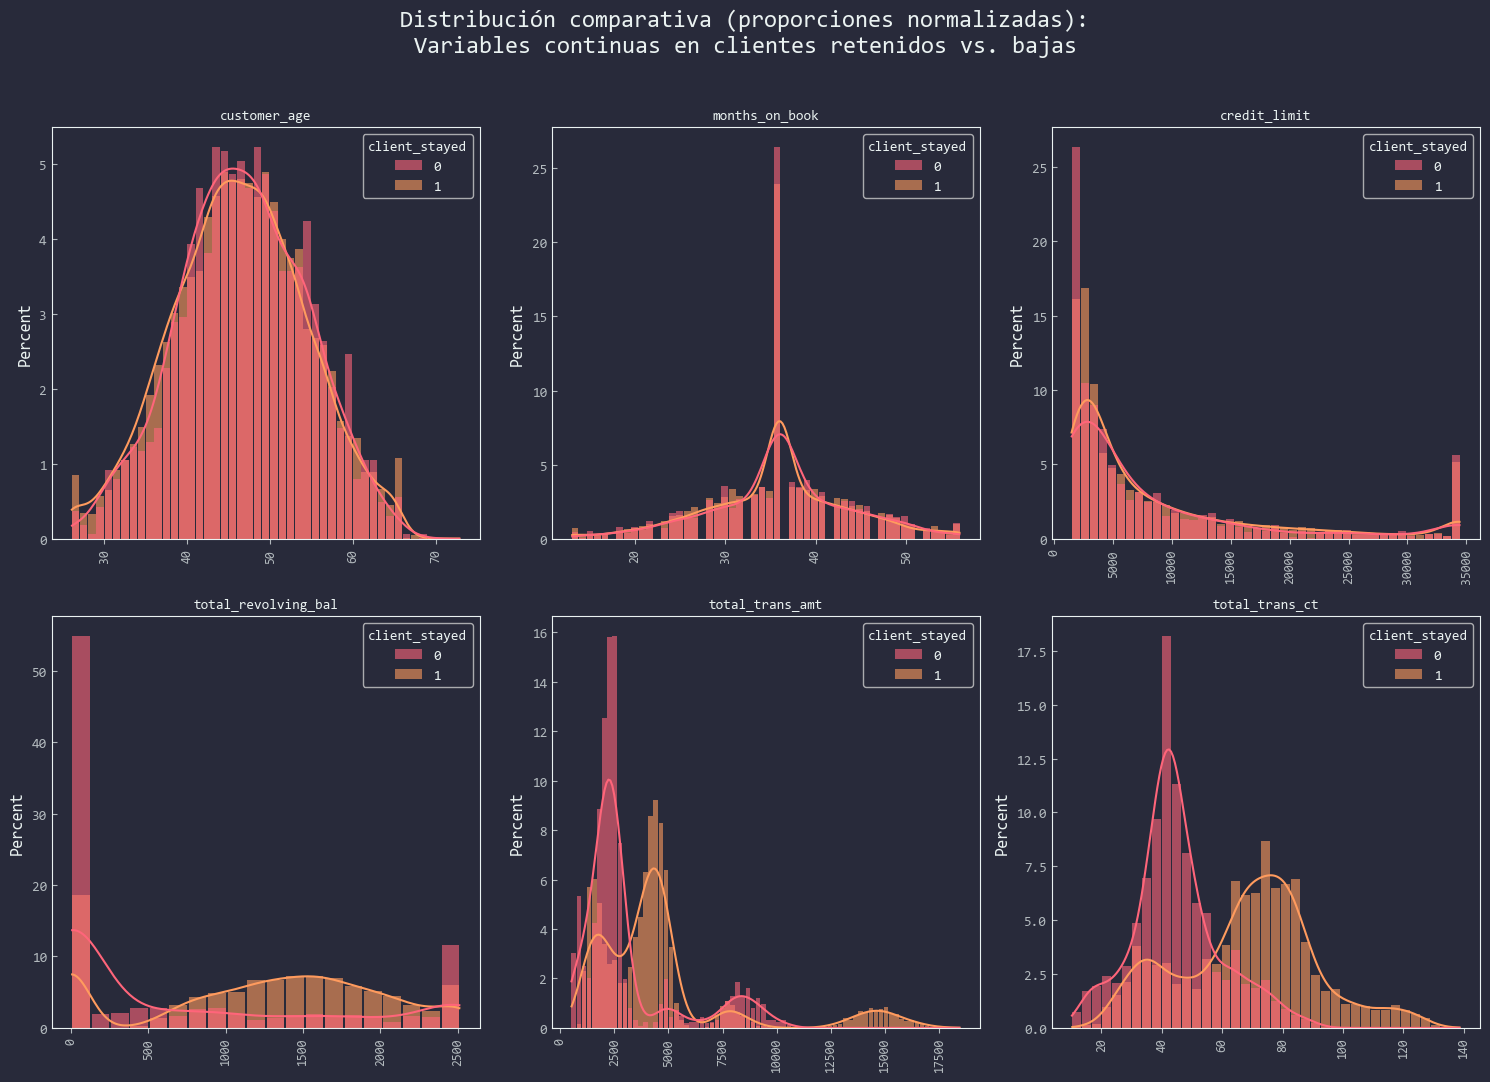

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 11))

for ax, column in zip(axes.flat, cardinalidad_alta.columns[1:]):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax, # multiple='dodge',
                 alpha=0.6, edgecolor='none', shrink=0.9,
                 stat='percent', common_norm=False, kde=True)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

fig.suptitle("Distribución comparativa (proporciones normalizadas):\n" +
             "Variables continuas en clientes retenidos vs. bajas",
             fontsize=17)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

- Las primeras 3 muestran distribuciones similares entre ambos grupos.
- Tres muestran diferencias significativas.
    - `total_revolving_bal`: Los clientes que se van presentan balances extremos (muy altos o muy bajos), mientras que los retenidos mantienen balances intermedios.
    - `total_tarans_amt`: Patrones de gasto claramente distintos entre grupos
    - `total_trans_ct`: La diferencia más marcada: los clientes retenidos realizan significativamente más transacciones. 
        - (Variable predictora más prometedora)

### Valore atípicos

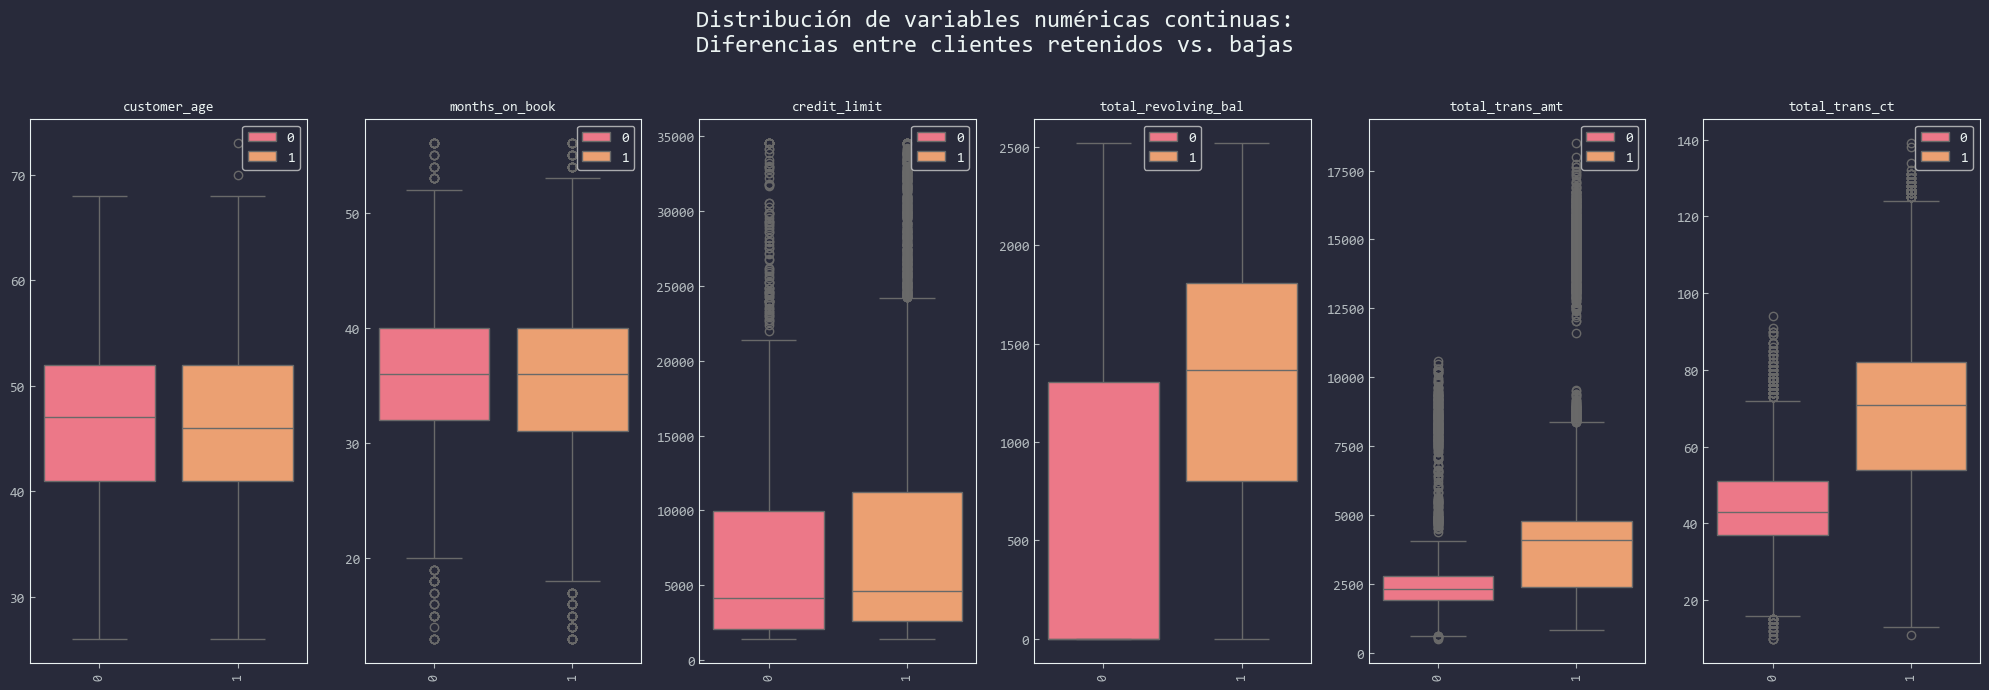

In [11]:
numeric_cols = cardinalidad_alta.drop('client_stayed', axis=1)

fig, axes = plt.subplots(1, 6, figsize=(20, 7))

for ax, column in zip(axes.flat, numeric_cols):
    sns.boxplot(data=df, x='client_stayed', y=column,
                hue='client_stayed', dodge=False, ax=ax)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend()

fig.suptitle("Distribución de variables numéricas continuas:\n" + 
             "Diferencias entre clientes retenidos vs. bajas",
             fontsize=17)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

- En general la misma cantidad de outliers para los clientes retenidos y para los dados de baja. 
- Tratamientos:
    - Winsorización para `customer_age` y `months_on_book` por tener pocos valores atípicos.
    - Transformación para `credit_limit`, `total_trans_amt` y `total_trans_ct` ya que presentan una gran cantidad de atípicos; (log, sqrt, etc.).

### Análisis cruzado

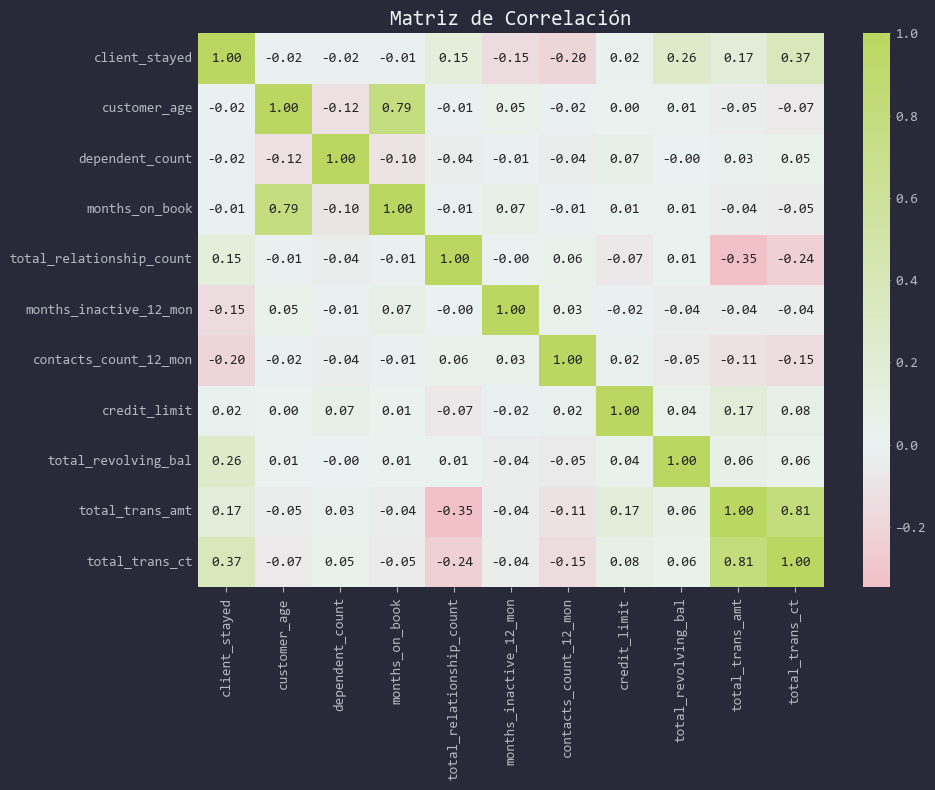

In [12]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=TOUTL_PALETTES["diverging"], fmt=".2f", center=0)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

- Variables con mayor correlación (absoluta) con la variable objetivo:
    - `total_trans_ct` (0.37)
    - `total_revolving_bal` (0.26)
    - `contacts_count_12_mon` (-0.20)
- Categorías relacionadas entre sí:
    - `total_trans_amt` y `total_trans_ct`, como era esperado.
    - `months_on_book` y `customer_age`.

In [13]:
income_clean = {'1666.6666666666667': '01667',
                '4166.666666666667': '04167',
                '5833.333333333333': '05833',
                '8333.333333333334': '08333',
                '10000.0': '10000',
                'Unknown': 'Unknown'}

df["income_category"] = df["income_category"].replace(income_clean)

orden_ingresos = ['01667', '04167', '05833', '08333', '10000', 'Unknown']

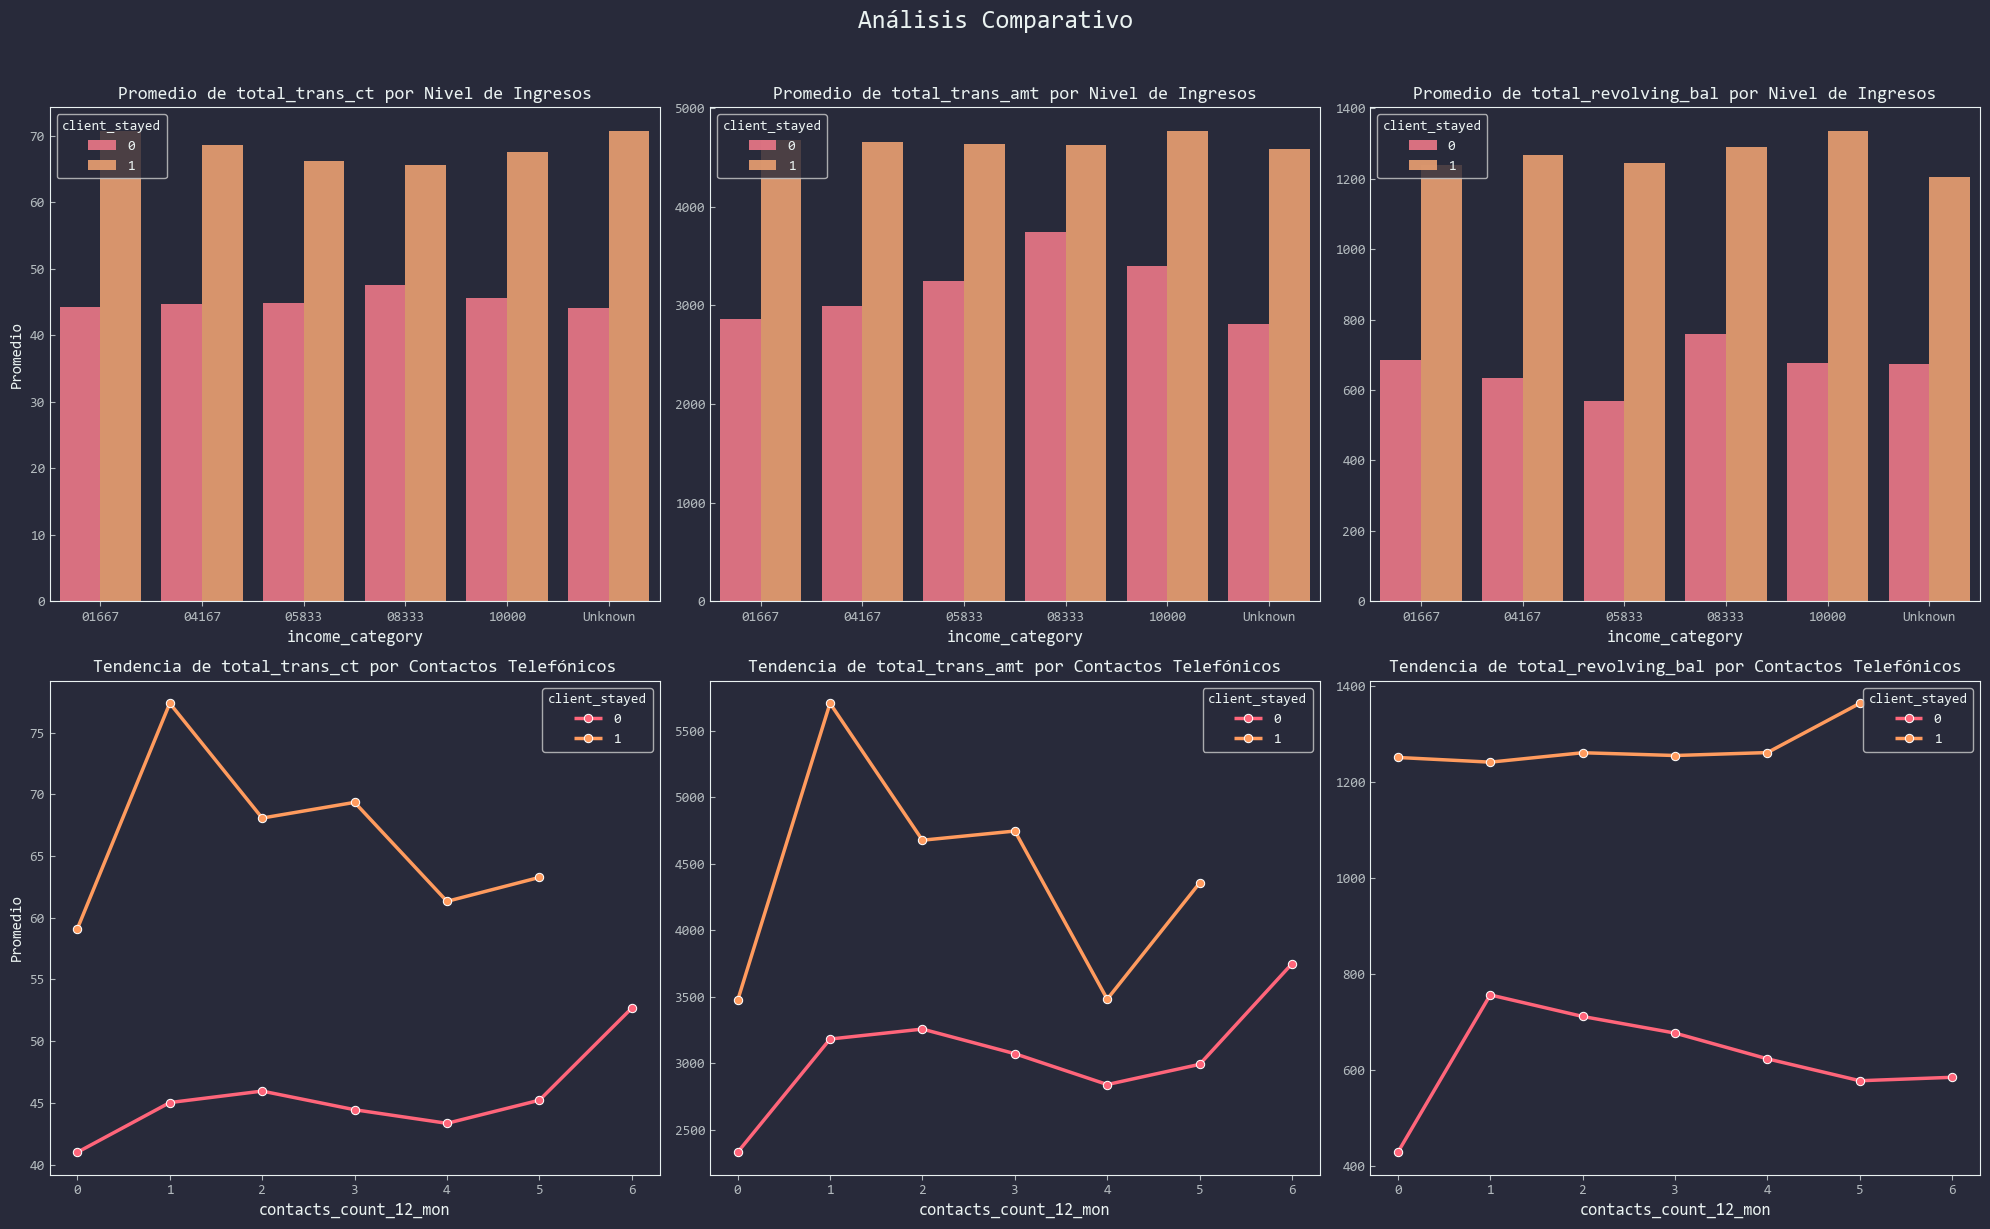

In [14]:
variables_compare = ['total_trans_ct', 'total_trans_amt', 'total_revolving_bal']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
plt.suptitle("Análisis Comparativo", fontsize=18, y=1.02)

for ax, col in zip(axes[0], variables_compare):
    sns.barplot(data=df, x="income_category", y=col, hue="client_stayed", ax=ax,
                estimator='mean', errorbar=None, alpha=0.9, order=orden_ingresos)
    ax.set_title(f"Promedio de {col} por Nivel de Ingresos", fontsize=13)
    ax.set_ylabel("Promedio" if ax == axes[0,0] else "", fontsize=11)

for ax, col in zip(axes[1], variables_compare):
    sns.lineplot(data=df, x="contacts_count_12_mon", y=col, hue="client_stayed",
                ax=ax, estimator='mean', errorbar=None, linewidth=2.5, marker='o')
    ax.set_title(f"Tendencia de {col} por Contactos Telefónicos", fontsize=13)
    ax.set_ylabel("Promedio" if ax == axes[1,0] else "", fontsize=11)
    ax.tick_params(axis='x')

plt.tight_layout()
plt.show()

- Las transacciones, el monto y el balance pendiente no presentan variaciones significativas según el nivel de ingreso del cliente.
- En promedio, los clientes que se dieron de baja muestran menor actividad en sus instrumentos crediticios en comparación con los que permanecieron.
- TODO...

---

## Preprocesamiento

Acciones a realizar:

- `gender`: A variable binaria.
- `education_level`: Limpiar 'Unknown's y codificar.
- `marital_status`: Limpiar 'Unknown's y codificar.
- `income_category`: Limpiar 'Unknown's y codificar.
- `card_category`: Codificar.
- `credit_limit`: Aplicar transformación.
- `total_revolving_bal`: Estandarizar.
- `total_trans_amt`: Aplicar transformación.
- `total_trans_ct`: Aplicar transformación.

In [20]:
df

,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,1,45,M,3,High School,Married,05833,Blue,39,5,1,3,12691.0,777,1144,42
1,1,49,F,5,Graduate,Single,01667,Blue,44,6,1,2,8256.0,864,1291,33
2,1,51,M,3,Graduate,Married,08333,Blue,36,4,1,0,3418.0,0,1887,20
3,1,40,F,4,High School,Unknown,01667,Blue,34,3,4,1,3313.0,2517,1171,20
4,1,40,M,3,Uneducated,Married,05833,Blue,21,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,M,2,Graduate,Single,04167,Blue,40,3,2,3,4003.0,1851,15476,117
10123,0,41,M,2,Unknown,Divorced,04167,Blue,25,4,2,3,4277.0,2186,8764,69
10124,0,44,F,1,High School,Married,01667,Blue,36,5,3,4,5409.0,0,10291,60
10125,0,30,M,2,Graduate,Unknown,04167,Blue,36,4,3,3,5281.0,0,8395,62


---

client_stayed         -1.848449
customer_age          -0.033605
months_on_book        -0.106565
credit_limit           1.666726
total_revolving_bal   -0.148837
total_trans_amt        2.041003
total_trans_ct         0.153673
dtype: float64

c:\Program Files\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Program Files\Python313\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


client_stayed         -1.848449
customer_age          -0.519661
months_on_book        -1.082464
credit_limit           0.457081
total_revolving_bal         NaN
total_trans_amt        0.262210
total_trans_ct        -0.770397
dtype: float64

client_stayed         -1.848449
customer_age          -0.457508
months_on_book        -0.939612
credit_limit           0.583434
total_revolving_bal   -1.110411
total_trans_amt        0.454049
total_trans_ct        -0.647394
dtype: float64

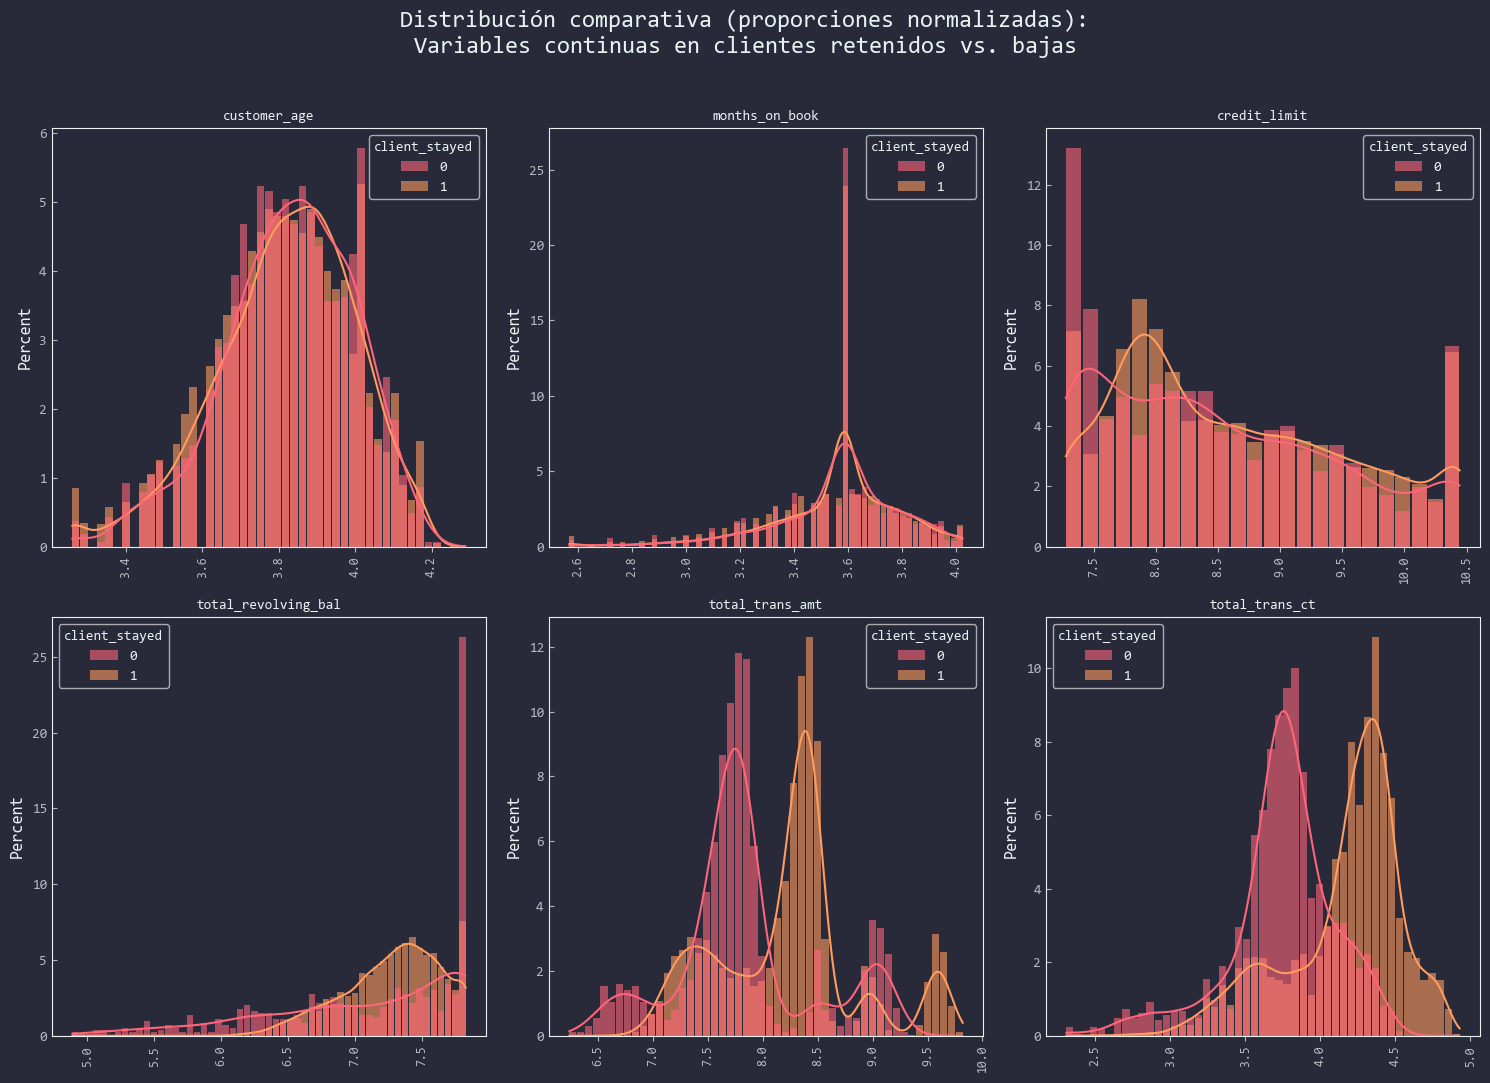

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 11))

from scipy.stats import boxcox
# display(cardinalidad_alta)
display(cardinalidad_alta.skew())
df2 = cardinalidad_alta.apply(lambda x: np.log(x) if x.name != "client_stayed" else x)
display(df2.skew())
df3 = cardinalidad_alta.apply(lambda x: boxcox(np.asarray(x)+1, 0.1) if x.name != "client_stayed" else x)
display(df3.skew())

for ax, column in zip(axes.flat, cardinalidad_alta.columns[1:]):
    sns.histplot(data=df2, x=column, hue='client_stayed', ax=ax, # multiple='dodge',
                 alpha=0.6, edgecolor='none', shrink=0.9,
                 stat='percent', common_norm=False, kde=True)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

fig.suptitle("Distribución comparativa (proporciones normalizadas):\n" +
             "Variables continuas en clientes retenidos vs. bajas",
             fontsize=17)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

#### Unknown aparece en tres variables

Segun las distribuciones categóricas

In [21]:
var_unknown = ["education_level", "marital_status", "income_category"]

df_vu = df[["client_stayed"] + var_unknown]
display(df_vu.head())

,client_stayed,education_level,marital_status,income_category
0,1,High School,Married,5833.333333333333
1,1,Graduate,Single,1666.6666666666667
2,1,Graduate,Married,8333.333333333334
3,1,High School,Unknown,1666.6666666666667
4,1,Uneducated,Married,5833.333333333333


In [22]:
results = {}

for var in var_unknown:
    proportions = df_vu.groupby(var)['client_stayed'].value_counts(normalize=True).unstack()
    
    results[var] = proportions
    
    print(f"\n=== Proportions by {var} ===")
    display(proportions.round(3))


=== Proportions by education_level ===


client_stayed,0,1
education_level,,
College,0.152,0.848
Doctorate,0.211,0.789
Graduate,0.156,0.844
High School,0.152,0.848
Post-Graduate,0.178,0.822
Uneducated,0.159,0.841
Unknown,0.169,0.831



=== Proportions by marital_status ===


client_stayed,0,1
marital_status,,
Divorced,0.162,0.838
Married,0.151,0.849
Single,0.169,0.831
Unknown,0.172,0.828



=== Proportions by income_category ===


client_stayed,0,1
income_category,,
10000.0,0.173,0.827
1666.6666666666667,0.172,0.828
4166.666666666667,0.151,0.849
5833.333333333333,0.135,0.865
8333.333333333334,0.158,0.842
Unknown,0.168,0.832


In [23]:
for var in var_unknown:
    print(df[var].value_counts(normalize=True)['Unknown'])

0.14999506270366347
0.07396069912116125
0.10980547052434086


In [24]:
for var in var_unknown:
    unknown_prop = results[var].loc['Unknown']
    other_prop = results[var].drop('Unknown').mean()

    print(var,f"Unknown: {unknown_prop[1]:.1%} stayed (1) vs. Known avg: {other_prop[1]:.1%} stayed")
 

education_level Unknown: 83.1% stayed (1) vs. Known avg: 83.2% stayed
marital_status Unknown: 82.8% stayed (1) vs. Known avg: 83.9% stayed
income_category Unknown: 83.2% stayed (1) vs. Known avg: 84.2% stayed


## Outliers

In [19]:
columnas_analizar = cardinalidad_alta.drop('client_stayed', axis=1).columns.tolist()

def generar_reporte_outliers(df, columnas):
    print("\n" + "="*92)
    print(f"{'REPORTE DE OUTLIERS - ANÁLISIS COMPLETO':^92}")
    print("="*92)
    print(f"{'Columna':<25} {'Tipo':<10} {'Outliers':>10} {'%':>8} {'L. Inferior':>15} {'L. Superior':>15}")
    print("-"*92)
    
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
        n_outliers = len(outliers)
        pct_outliers = (n_outliers/len(df))*100
        
        str_lim_inf = f"{lim_inf:,.2f}" if isinstance(lim_inf, float) else f"{int(lim_inf):,}"
        str_lim_sup = f"{lim_sup:,.2f}" if isinstance(lim_sup, float) else f"{int(lim_sup):,}"
        
        print(f"{col:<25} {str(df[col].dtype):<10} {n_outliers:>10,} {pct_outliers:>7.2f}% {str_lim_inf:>15} {str_lim_sup:>15}")

    print("="*92)

generar_reporte_outliers(df, columnas_analizar)


                          REPORTE DE OUTLIERS - ANÁLISIS COMPLETO                           
Columna                   Tipo         Outliers        %     L. Inferior     L. Superior
--------------------------------------------------------------------------------------------
customer_age              int64               2    0.02%           24.50           68.50
months_on_book            int64             386    3.81%           17.50           53.50
credit_limit              float64           984    9.72%      -10,213.75       23,836.25
total_revolving_bal       int64               0    0.00%       -1,778.50        3,921.50
total_trans_amt           int64             896    8.85%       -1,722.75        8,619.25
total_trans_ct            int64               2    0.02%           -9.00          135.00


In [26]:

def generar_reporte_outliers_por_grupo(df, columnas, grupo_col='client_stayed'):
    col_width = 22
    type_width = 10
    outliers_width = 10
    pct_width = 8
    limit_width = 15
    
    for grupo in sorted(df[grupo_col].unique()):
        print(f"\n{'ANÁLISIS PARA CLIENT_STAYED =':<20} {grupo}")
        print("-"*100)
        print(f"{'Columna':<{col_width}} {'Tipo':<{type_width}} {'Outliers':>{outliers_width}} "
              f"{'%':>{pct_width}} {'L. Inferior':>{limit_width}} {'L. Superior':>{limit_width}}")
        print("-"*100)
        
        grupo_df = df[df[grupo_col] == grupo]
        
        for col in columnas:
            Q1 = grupo_df[col].quantile(0.25)
            Q3 = grupo_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lim_inf = Q1 - 1.5 * IQR
            lim_sup = Q3 + 1.5 * IQR
            
            outliers = grupo_df[(grupo_df[col] < lim_inf) | (grupo_df[col] > lim_sup)]
            n_outliers = len(outliers)
            pct_outliers = (n_outliers/len(grupo_df))*100
            
            is_float = isinstance(grupo_df[col].iloc[0], float)
            fmt_lim = "{:,.2f}" if is_float else "{:,}"
            
            print(f"{col:<{col_width}} {str(grupo_df[col].dtype):<{type_width}} "
                  f"{n_outliers:>{outliers_width},} {pct_outliers:>{pct_width-1}.2f}% "
                  f"{fmt_lim.format(lim_inf):>{limit_width}} {fmt_lim.format(lim_sup):>{limit_width}}")
    
    print("="*100)

generar_reporte_outliers_por_grupo(df, columnas_analizar)


ANÁLISIS PARA CLIENT_STAYED = 0
----------------------------------------------------------------------------------------------------
Columna                Tipo         Outliers        %     L. Inferior     L. Superior
----------------------------------------------------------------------------------------------------
customer_age           int64               0    0.00%            24.5            68.5
dependent_count        int64             199   12.23%             0.5             4.5
months_on_book         int64              77    4.73%            20.0            52.0
total_relationship_count int64               0    0.00%            -2.5             9.5
months_inactive_12_mon int64              66    4.06%             0.5             4.5
contacts_count_12_mon  int64               0    0.00%            -1.0             7.0
credit_limit           float64           173   10.63%       -9,615.25       21,662.75
total_revolving_bal    int64               0    0.00%       -1,955.25      

In [27]:
def agregar_columna_vip(df, columna_credito='credit_limit', grupo_col='client_stayed', 
                        metodo='IQR', umbral=1.5, inplace=False):
    
    if not inplace:
        df = df.copy()
    
    
    df['vip'] = 0
    
    for grupo in df[grupo_col].unique():
        mascara_grupo = df[grupo_col] == grupo
        datos_credito = df.loc[mascara_grupo, columna_credito]
        
        
        if metodo == 'IQR':
            Q1 = datos_credito.quantile(0.25)
            Q3 = datos_credito.quantile(0.75)
            IQR = Q3 - Q1
            limite_superior = Q3 + umbral * IQR
        elif metodo == 'zscore':
            mediana = datos_credito.median()
            mad = np.median(np.abs(datos_credito - mediana))
            limite_superior = mediana + umbral * mad / 0.6745
        else:
            raise ValueError("Método debe ser 'IQR' o 'zscore'")
        
      
        df.loc[(mascara_grupo) & (df[columna_credito] > limite_superior), 'vip'] = 1
    
    
    total_vips = df['vip'].sum()
    print(f"Total clientes VIP identificados: {total_vips}")
    print("\nDistribución de VIPs por grupo:")
    print(pd.crosstab(df[grupo_col], df['vip'], margins=True))
    
    if not inplace:
        return df

In [28]:
df = agregar_columna_vip(
    df=df,
    columna_credito='credit_limit',
    grupo_col='client_stayed',
    metodo='IQR',
    umbral=1.5
)
df.head()

Total clientes VIP identificados: 967

Distribución de VIPs por grupo:
vip               0    1    All
client_stayed                  
0              1454  173   1627
1              7706  794   8500
All            9160  967  10127


,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,vip
0,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42,0
1,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33,0
2,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20,0
3,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20,0
4,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28,0


In [29]:
def sustituir_outliers_por_grupo(df, columnas_a_tratar, grupo_col='client_stayed', 
                                metodo='IQR', umbral=1.5, estrategia='limite'):
    
    df_tratado = df.copy(deep=True)
    

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        for grupo in df[grupo_col].unique():
            mascara_grupo = df[grupo_col] == grupo
            
            for columna in columnas_a_tratar:
                if columna not in df.columns:
                    continue
                    
                datos_grupo = df.loc[mascara_grupo, columna]
                
             
                if metodo == 'IQR':
                    Q1 = datos_grupo.quantile(0.25)
                    Q3 = datos_grupo.quantile(0.75)
                    IQR = Q3 - Q1
                    limite_inferior = Q1 - umbral * IQR
                    limite_superior = Q3 + umbral * IQR
                elif metodo == 'zscore':
                    mediana = datos_grupo.median()
                    mad = np.median(np.abs(datos_grupo - mediana))
                    limite_inferior = mediana - umbral * mad / 0.6745
                    limite_superior = mediana + umbral * mad / 0.6745
                else:
                    raise ValueError("Método no reconocido. Use 'IQR' o 'zscore'")
                
            
                es_outlier = ((datos_grupo < limite_inferior) | 
                             (datos_grupo > limite_superior))
                
                if not es_outlier.any():  
                    continue
                    
         
                if estrategia == 'limite':
                    valores_corregidos = np.clip(
                        df.loc[mascara_grupo & es_outlier, columna], 
                        limite_inferior, 
                        limite_superior
                    )
                elif estrategia == 'mediana':
                    valores_corregidos = datos_grupo.median()
                elif estrategia == 'media_recortada':
                    mascara_no_outliers = ~es_outlier & mascara_grupo
                    valores_corregidos = df.loc[mascara_no_outliers, columna].mean()
                else:
                    raise ValueError("Estrategia no reconocida. Use 'limite', 'mediana' o 'media_recortada'")
                
                df_tratado.loc[mascara_grupo & es_outlier, columna] = valores_corregidos.astype(df[columna].dtype)
    
    return df_tratado

In [30]:
df['credit_limit'] = df['credit_limit'].astype('int64')

columnas_a_tratar = df.select_dtypes(include=['int64']).drop(
    columns=['clientnum', 'client_stayed', 'customer_age','vip'], 
    errors='ignore'
).columns.tolist()

In [31]:
df = sustituir_outliers_por_grupo(
    df=df,
    columnas_a_tratar=columnas_a_tratar,
    grupo_col='client_stayed',
    metodo='IQR',
    umbral=1.5,
    estrategia='limite'  # Corregido: era 'estrategia' en tu llamada original
)

In [32]:
generar_reporte_outliers_por_grupo(df, columnas_a_tratar)


ANÁLISIS PARA CLIENT_STAYED = 0
----------------------------------------------------------------------------------------------------
Columna                Tipo         Outliers        %     L. Inferior     L. Superior
----------------------------------------------------------------------------------------------------
dependent_count        int64             135    8.30%             0.5             4.5
months_on_book         int64               0    0.00%            20.0            52.0
total_relationship_count int64               0    0.00%            -2.5             9.5
months_inactive_12_mon int64              15    0.92%             0.5             4.5
contacts_count_12_mon  int64               0    0.00%            -1.0             7.0
credit_limit           int64               0    0.00%       -9,615.25       21,662.75
total_revolving_bal    int64               0    0.00%       -1,955.25        3,258.75
total_trans_amt        int64               7    0.43%          600.75      

## Codificación

In [33]:
df = df.copy()
df.head()

,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,vip
0,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691,777,1144,42,0
1,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256,864,1291,33,0
2,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418,0,1887,20,0
3,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313,2517,1171,20,0
4,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716,0,816,28,0


##### Genero a variable binaria

In [34]:
if 'gender' in df.columns:
    df["is_female"] = (df["gender"] == "F").astype(int)
    df = df.drop(['gender'], axis=1)

Utilizaremos tres métodos para codificar las variabales categóricas ordinales:
  - Ordinal Encoder
  - **CONTRASTE POLINÓMICO LINEAL**
  - **CONTRASTE POLINÓMICO CUADRÁTICO CON UNA PARÁBOLA CÓNCAVA** (suena épico)

Además, utilizar estas técnicas permiten mantener la ordinalidad de las variables.

La codificación ordinal tradicional asigna valores enteros consecutivos a las categorías, lo que puede introducir una distancia artificial y uniforme entre categorías adyacentes que no refleja la verdadera relación entre ellas.

Los contrastes polinómicos permiten capturar relaciones no lineales entre los niveles de la variable ordinal y la variable objetivo. 

El contraste lineal captura tendencias crecientes o decrecientes, mientras que el cuadrático puede modelar relaciones donde los valores extremos tienen un comportamiento diferente a los valores intermedios.

In [36]:
def codificacion_lineal(var_ordenada,a1=1):
    n=len(var_ordenada)
    lim=n-1 if n%2==0 else (n-1)//2
    step=2 if n%2==0 else 1
    X=range(-lim,lim+1,step)
    a0=0
    Y=[a0+a1*x for x in X]
    return {categoria:y for categoria,y in zip(var_ordenada,Y)}

In [37]:
def codificacion_cuadratica(var_ordenada,a2=1,a1=0.1):
    n=len(var_ordenada)
    lim=n-1 if n%2==0 else (n-1)//2
    step=2 if n%2==0 else 1
    X=range(-lim,lim+1,step)
    a0=-a2*np.sum([x**2 for x in X])/n
    Y=[a0+a1*x+a2*x**2 for x in X]
    return {categoria:y for categoria,y in zip(var_ordenada,Y)}

##### Educación
Utiliza codificación cuadrática ya que la distancia entre los niveles educativos no son uniformes, además contamos con 'Unknown', (que es puesto en el centro para disminuir la chance error).

In [38]:
education_ordered = ['Uneducated', 'High School', 'College', 'Unknown', 'Graduate', 'Post-Graduate', 'Doctorate']
education_cod2 = codificacion_cuadratica(education_ordered)
display(education_cod2)
if 'education_level' in df.columns:
    df['education_encoded'] = df['education_level'].map(education_cod2)
    df = df.drop(['education_level'], axis=1)
df.head()

{'Uneducated': np.float64(4.7),
 'High School': np.float64(-0.20000000000000018),
 'College': np.float64(-3.0999999999999996),
 'Unknown': np.float64(-4.0),
 'Graduate': np.float64(-2.9),
 'Post-Graduate': np.float64(0.20000000000000018),
 'Doctorate': np.float64(5.3)}

,client_stayed,customer_age,dependent_count,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,vip,is_female,education_encoded
0,1,45,3,Married,5833.333333333333,Blue,39,5,1,3,12691,777,1144,42,0,0,-0.2
1,1,49,5,Single,1666.6666666666667,Blue,44,6,1,2,8256,864,1291,33,0,1,-2.9
2,1,51,3,Married,8333.333333333334,Blue,36,4,1,0,3418,0,1887,20,0,0,-2.9
3,1,40,4,Unknown,1666.6666666666667,Blue,34,3,4,1,3313,2517,1171,20,0,1,-0.2
4,1,40,3,Married,5833.333333333333,Blue,21,5,1,0,4716,0,816,28,0,0,4.7


##### Income
Utiliza codificación lineal ya que la distancia entre las categorías son más continuas, aún contamos con 'Unknown', (que es puesto en el centro para disminuir la chance error).


In [39]:
income_ordered = ['1666.6666666666667',
                  '4166.666666666667',
                  '5833.333333333333',
                  'Unknown',
                  '8333.333333333334',
                  '10000.0']
income_cod = codificacion_lineal(income_ordered)
display(income_cod)
if 'income_category' in df.columns:
    df['income_encoded'] = df['income_category'].map(income_cod)
    df = df.drop(['income_category'], axis=1)

{'1666.6666666666667': -5,
 '4166.666666666667': -3,
 '5833.333333333333': -1,
 'Unknown': 1,
 '8333.333333333334': 3,
 '10000.0': 5}

##### Tarjeta
Utilizamos codificación lineal ya que las variables no presenten un orden en el que no sabemos complentenmetne la diferencia entre una categoría y otra, aún contamos con 'Unknown', (que es puesto en el centro para disminuir la chance error).


In [40]:
card_ordered = ['Blue', 'Silver', 'Gold', 'Platinum']
card_cod = codificacion_lineal(card_ordered)
display(card_cod)
if 'card_category' in df.columns:
    df['card_encoded'] = df['card_category'].map(card_cod)
    df = df.drop(['card_category'], axis=1)

{'Blue': -3, 'Silver': -1, 'Gold': 1, 'Platinum': 3}

##### Aplicando OneHot

In [41]:
if 'marital_status' in df.columns:
    marital_encoded = {
            'Unknown': 0,
            'Single': 1,
            'Married': 2,
            'Divorced': 3}
    df['marital_encoded'] = df['marital_status'].map(marital_encoded)
    df = df.drop(['marital_status'], axis=1)

In [42]:
if 'income_category' in df.columns:
    valores_unicos = df['income_category'].unique().tolist()
    encoded_values = {original: indice for indice, original in enumerate(sorted(valores_unicos))}
    display(encoded_values)
    df['income_encoded'] = df['income_category'].replace(encoded_values)
    df = df.drop(['income_category'], axis=1)

In [43]:
if 'card_category' in df.columns:
    valores_unicos = df['card_category'].unique().tolist()
    encoded_values = {original: indice for indice, original in enumerate(valores_unicos)}
    display(encoded_values)
    df['card_encoded'] = df['card_category'].replace(encoded_values)
    df = df.drop(['card_category'], axis=1)

In [44]:
df

,client_stayed,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,vip,is_female,education_encoded,income_encoded,card_encoded,marital_encoded
0,1,45,3,39,5,1,3,12691,777,1144,42,0,0,-0.2,-1,-3,2
1,1,49,5,44,6,1,2,8256,864,1291,33,0,1,-2.9,-5,-3,1
2,1,51,3,36,4,1,0,3418,0,1887,20,0,0,-2.9,3,-3,2
3,1,40,4,34,3,4,1,3313,2517,1171,20,0,1,-0.2,-5,-3,0
4,1,40,3,21,5,1,0,4716,0,816,28,0,0,4.7,-1,-3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,2,40,3,2,3,4003,1851,8376,117,0,0,-2.9,-3,-3,1
10123,0,41,2,25,4,2,3,4277,2186,4074,69,0,0,-4.0,-3,-3,3
10124,0,44,1,36,5,3,4,5409,0,4074,60,0,1,-0.2,-5,-3,2
10125,0,30,2,36,4,3,3,5281,0,4074,62,0,0,-2.9,-3,-3,0


## Nuevas variables

In [45]:
df["instrumento_cred"] = df["total_trans_amt"] / df["card_encoded"]

## Regresion para el final

In [ ]:
# # Opción 1: Incluir "Unknown" (usando 'nivel_encoded' ya calculado)
# X = df[['nivel_encoded']]
# y = df['client_stayed']
# model = LogisticRegression().fit(X, y)
# y_pred = model.predict_proba(X)[:, 1]
# print(f"AUC con 'Unknown': {roc_auc_score(y, y_pred):.2f}")

# # Opción 2: Eliminar "Unknown" (CORRECCIÓN: sin comilla extra en 'client_stayed')
# df_clean = df[df['education_level'] != 'Unknown']  # Asegúrate que el nombre de la columna coincide
# X_clean = df_clean[['nivel_encoded']]
# y_clean = df_clean['client_stayed']  # <- Corrección aquí (sin comillas adicionales)
# model_clean = LogisticRegression().fit(X_clean, y_clean)
# y_pred_clean = model_clean.predict_proba(X_clean)[:, 1]
# print(f"AUC sin 'Unknown': {roc_auc_score(y_clean, y_pred_clean):.2f}")